In [1]:
import pandas as pd
from sklearn.utils import shuffle


In [2]:
df = pd.read_csv('task2_en_training.tsv', sep='\t')[['class', 'tweet']]
df['class'] = df['class'].apply(lambda x: '__label__' + str(x))

df = shuffle(df)
#df[['class', 'tweet']].to_csv('TRAIN.txt', header=False, index=False, sep="\t")

df_train = df[['class', 'tweet']][:16400]
df_train[['class', 'tweet']].to_csv('TRAIN.txt', header=False, index=False, sep="\t")

df_test= df[['class', 'tweet']][16400:]
df_test[['class', 'tweet']].to_csv('TEST.txt', header=False, index=False, sep="\t")
(df_train, df_test)

(            class                                              tweet
 3063   __label__1  @theeastmovie thank you so much for getting th...
 17635  __label__0  i watched a guy overdose on buprenorphine toda...
 7945   __label__0  @geek2nurse yeah- saphris needs a pa, but it's...
 5445   __label__0  i have enough vyvanse for all the.women who ar...
 7148   __label__0  @wishuponabar @jnapodano @jefflstein solitromy...
 ...           ...                                                ...
 10651  __label__0  after 1 albuterol treatment i feel 10x better....
 9460   __label__0  neurontin to the rescue!!  thanks to this frea...
 6662   __label__0  one day that will be me lyrica proved anything...
 8247   __label__0  @rupertmurdoch hats off to you for funding the...
 11508  __label__0            linagliptin can be used as monotheraphy
 
 [16400 rows x 2 columns],
             class                                              tweet
 17248  __label__0  i take diclofenac even when i'm sad 😂 or 

In [3]:
import fasttext

graph = []
maxima, maxima_idx = 0, 0

for epoch in range(15):
    model = fasttext.train_supervised(input='TRAIN.txt', epoch=epoch)
    All, Pos = 0, 0
    for (clas, tweet) in zip(df_test['class'], df_test['tweet']):
        All += 1
        if int(clas[-1]) == int(model.predict(tweet, k=2)[0][0][-1]): 
            #print(int(clas[-1]),int(model.predict(tweet, k=2)[0][0][-1]))
            Pos += 1
    graph.append(Pos/All)
    if Pos/All > maxima: maxima, maxima_idx = Pos/All, epoch

print("the best accuracy:")
print(maxima, f'on the {maxima_idx} epoch')


the best accuracy:
0.9181949806949807 on the 12 epoch


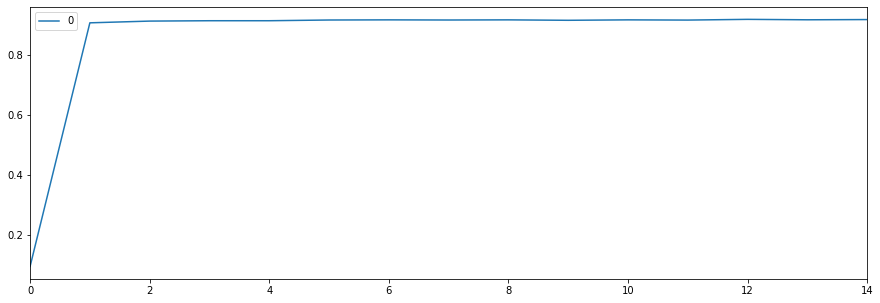

In [12]:
graph = pd.DataFrame(graph)
graph.plot(figsize=(15,5))

In [13]:
model.words[:10],[model.get_word_vector(word) for word in model.words][1]

(['</s>', 'i', 'the', 'to', 'a', 'and', 'of', 'for', 'is', 'my'],
 array([ 0.00198486, -0.01311096,  0.0206498 ,  0.00238326, -0.01523213,
        -0.00606019, -0.00195393,  0.00613475, -0.0300159 , -0.02483183,
         0.01161037, -0.01555048, -0.00512566,  0.00575361, -0.00554198,
        -0.00811313,  0.00214951,  0.00673528, -0.00773191,  0.00424628,
        -0.00625396, -0.00145532, -0.00076351,  0.0143181 , -0.00672506,
        -0.00035832, -0.01847155,  0.0081014 ,  0.00052129, -0.01052208,
        -0.00523822, -0.00015788,  0.0049852 , -0.00401628, -0.00248579,
        -0.00022412, -0.00702328,  0.00206682, -0.00218954, -0.00348415,
        -0.00753114,  0.01480638, -0.00455364,  0.00664743,  0.00587378,
         0.00359442,  0.00609   , -0.0031895 , -0.00059902, -0.00098792,
         0.00986935, -0.00812234,  0.01003768,  0.00063841, -0.00585799,
         0.00707442, -0.00866959, -0.00226116,  0.00331482, -0.00574939,
         0.00131375,  0.00581103,  0.0046372 ,  0.00772377